In [ ]:
!nvidia-smi

Wed Feb  5 06:48:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             33W /   70W |    1150MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import gdown
import zipfile
import os

In [ ]:
try:
    file_id = "https://drive.google.com/file/d/1n_0za90fHWo9uopP9XipKNcjLPvgrNT4/view?usp=sharing".split("/")[-2]
    prefix =  'https://drive.google.com/uc?/export=download&id='
    gdown.download(prefix + file_id)
except Exception as e:
    raise e

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1n_0za90fHWo9uopP9XipKNcjLPvgrNT4
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1n_0za90fHWo9uopP9XipKNcjLPvgrNT4&confirm=t&uuid=6c54e3a1-eee8-4860-9e81-fe173c2baaf5
To: /content/track-master.zip
100%|██████████| 167M/167M [00:05<00:00, 31.5MB/s]


In [ ]:
with zipfile.ZipFile('/content/track-master.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import ntpath
import random
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Convolution2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa


In [ ]:
data_dir = '/content/data/track-master'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(data_dir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [ ]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [ ]:
print("shape of the dataset" , data.shape)
print("information about the dataset", data.info())


shape of the dataset (4053, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center    4053 non-null   object 
 1   left      4053 non-null   object 
 2   right     4053 non-null   object 
 3   steering  4053 non-null   float64
 4   throttle  4053 non-null   float64
 5   reverse   4053 non-null   float64
 6   speed     4053 non-null   float64
dtypes: float64(4), object(3)
memory usage: 221.8+ KB
information about the dataset None


In [ ]:
data.describe()

,steering,throttle,reverse,speed
count,4053.000000,4053.000000,4053.000000,4053.000000
mean,-0.004065,0.961555,0.020428,29.185788
std,0.190549,0.188981,0.139731,4.598976
min,-1.000000,0.000000,0.000000,0.048339
25%,0.000000,1.000000,0.000000,30.188690
50%,0.000000,1.000000,0.000000,30.190260
75%,0.000000,1.000000,0.000000,30.190300
max,1.000000,1.000000,1.000000,30.652640


# Doing EDA Part

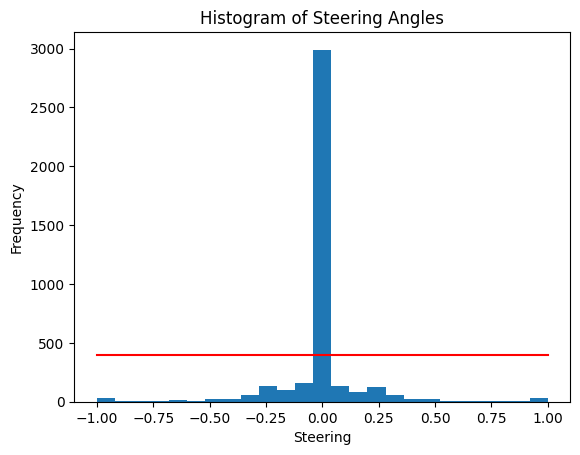

In [ ]:
# analize the steering position
num_bins = 25
samples_per_bin = 400
his, bins = np.histogram(data["steering"],num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
bar_width = bins[1] - bins[0]
plt.bar(center, his, width=bar_width)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin),color="red")
plt.xlabel("Steering")
plt.ylabel("Frequency")
plt.title("Histogram of Steering Angles")
plt.show()

In [ ]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining', len(data))

removed 2590
remaining 1463


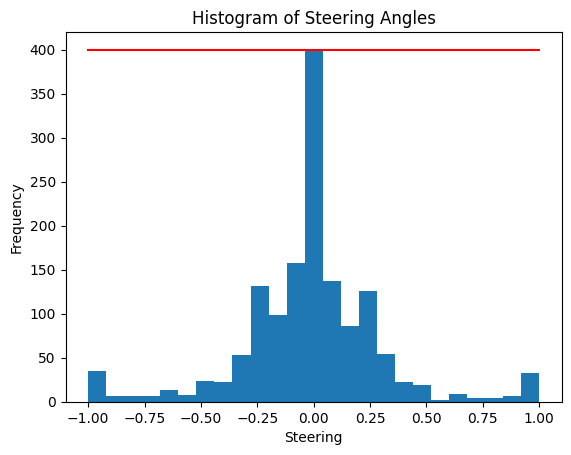

In [ ]:
his, bins = np.histogram(data["steering"],num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
bar_width = bins[1] - bins[0]
plt.bar(center, his, width=bar_width,)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin),color="red")
plt.xlabel("Steering")
plt.ylabel("Frequency")
plt.title("Histogram of Steering Angles")
plt.show()

In [ ]:
def load_img_steering(datadir, data):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))

    image_path.append(os.path.join(datadir, left.strip()))
    steering.append(float(indexed_data[3]) + 0.15)

    image_path.append(os.path.join(datadir, right.strip()))
    steering.append(float(indexed_data[3]) - 0.15)

  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings


In [ ]:
image_paths, steerings = load_img_steering(data_dir + '/IMG', data)

<ipython-input-40-eb9ca3eaae18>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
<ipython-input-40-eb9ca3eaae18>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
<ipython-input-40-eb9ca3eaae18>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]) + 0.15)
<ipython-input-40-eb9ca3eaae18>:1

In [ ]:
image_paths

array(['/content/data/track-master/IMG/center_2018_07_16_17_11_43_930.jpg',
       '/content/data/track-master/IMG/left_2018_07_16_17_11_43_930.jpg',
       '/content/data/track-master/IMG/right_2018_07_16_17_11_43_930.jpg',
       ...,
       '/content/data/track-master/IMG/center_2018_07_16_17_16_31_544.jpg',
       '/content/data/track-master/IMG/left_2018_07_16_17_16_31_544.jpg',
       '/content/data/track-master/IMG/right_2018_07_16_17_16_31_544.jpg'],
      dtype='<U65')

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(image_paths, steerings, test_size=0.2, random_state=40)
print('Training Samples: {}\nValid Samples: {}'.format(len(x_train), len(x_val)))

Training Samples: 3511
Valid Samples: 878


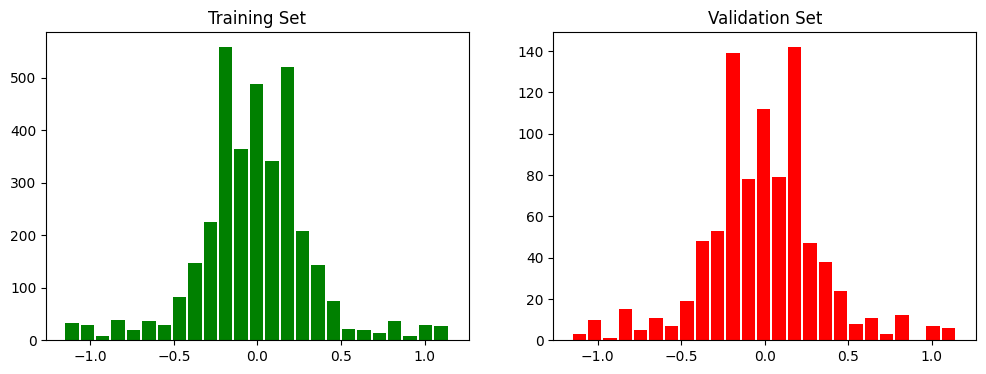

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=bar_width, color='green')
axes[0].set_title('Training Set')
axes[1].hist(y_val, bins=num_bins, width=bar_width, color='red')
axes[1].set_title('Validation Set')
plt.show()

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

def flip(image, steering):
  image = cv2.flip(image, 1)
  steering = -steering
  return image, steering

def pan(image):
  pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

def adjust_brightness(image):
  brightness = iaa.Multiply((0.4, 1.2))
  image = brightness.augment_image(image)
  return image


In [ ]:
def image_agmentation(image, steering):
    image = cv2.imread(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = adjust_brightness(image)
    if np.random.rand() < 0.5:
        image, steering = flip(image, steering)
    return image, steering

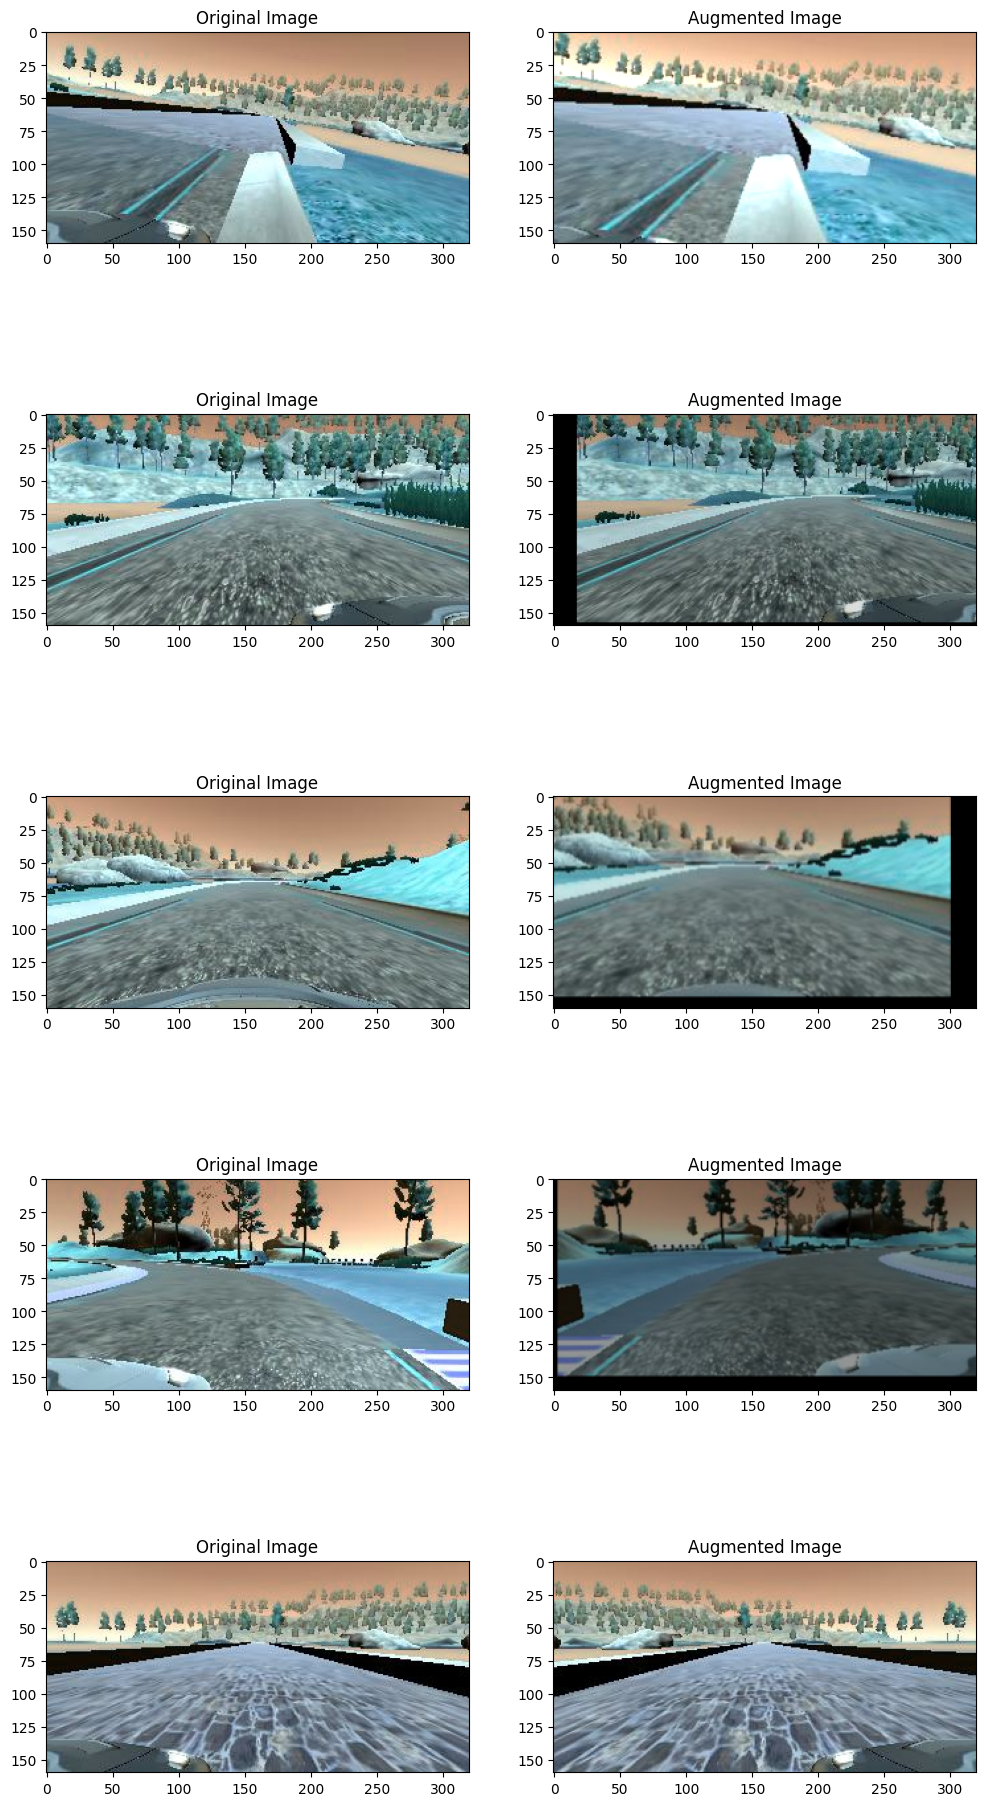

In [ ]:
row = 5
col = 2
fig, axes = plt.subplots(row, col, figsize=(12,24))

for i in range (5):
  rand_num = random.randint(0, len(image_paths) - 1)
  image = image_paths[rand_num]
  steering = steerings[rand_num]

  original_image = cv2.imread(image)
  augmented_image, steering = image_agmentation(image, steering)

  axes[i][0].imshow(original_image)
  axes[i][0].set_title("Original Image")

  axes[i][1].imshow(augmented_image)
  axes[i][1].set_title("Augmented Image")

In [ ]:
def image_preprocess(img):
    img = img[50:300,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

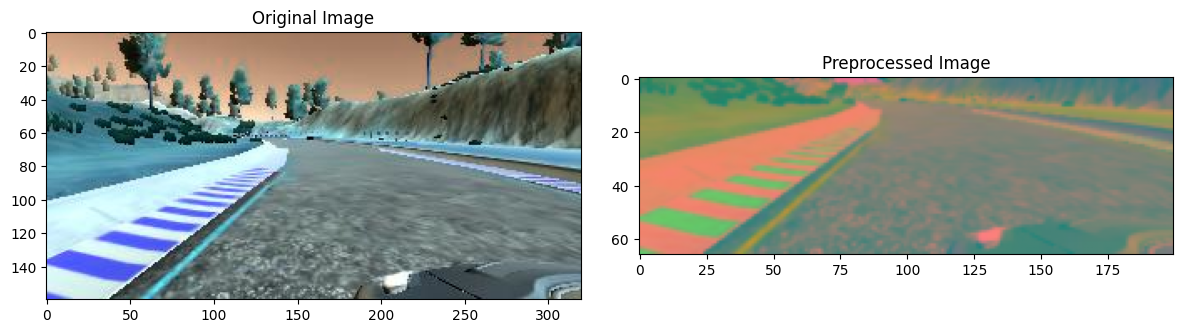

In [ ]:
img = image_paths[100]
original_image = cv2.imread(img)
preprocessed_image = image_preprocess(original_image)

fig, axes = plt.subplots(1,2 , figsize=(12,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')



In [ ]:
def batch_generator(image_paths, steering_angle, batch_size, is_training):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      if is_training:
        image , steering = image_agmentation(image_paths[random_index], steering_angle[random_index])
      else:
        image = cv2.imread(image_paths[random_index])
        steering = steering_angle[random_index]

      image_pre = image_preprocess(image)
      batch_img.append(image_pre)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

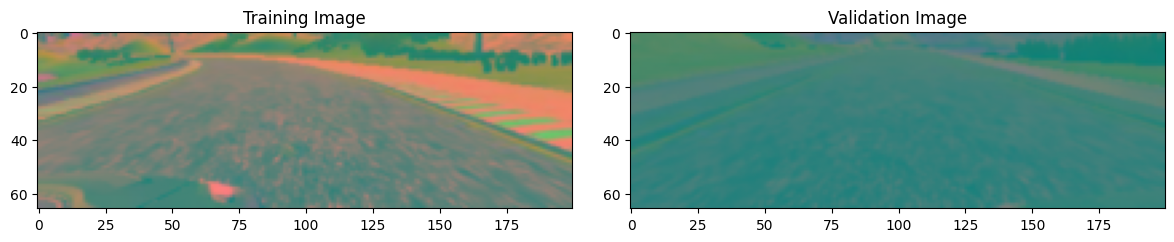

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(x_train, y_train, 1, 1))
x_val_gen, y_val_gen = next(batch_generator(x_val, y_val, 1,1))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout()
axes[0].imshow(x_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(x_val_gen[0])
axes[1].set_title('Validation Image')

In [ ]:
# Modified NVIDIA Model
def nvidia_model():
    model = Sequential()

    model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='elu', input_shape= (66, 200, 3)))
    model.add(Conv2D(36, (5, 5), strides=(2, 2),activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2),activation='elu'))

    # 3x3 Convolutional layers with stride of 1x1
    model.add(Conv2D(64, (3, 3),activation='elu'))
    model.add(Conv2D(64, (3, 3),activation='elu'))

    # Flatten before passing to the fully connected layers
    model.add(Flatten())
    # Three fully connected layers
    model.add(Dense(100,activation='elu'))
    model.add(Dropout(.04))
    model.add(Dense(50,activation='elu'))
    model.add(Dropout(.04))
    model.add(Dense(10,activation='elu'))
    model.add(Dropout(.04))
    model.add(Dense(1))

    # Optimizer with reduced learning rate
    optimizer = Adam(learning_rate=1e-3)

    # Compile the model with proper regression metrics
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])

    return model


In [ ]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1, 18, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(batch_generator(x_train, y_train, 100, 1),
                    steps_per_epoch=300,
                    epochs=50,
                    validation_data=batch_generator(x_val, y_val, 100, 0),
                    validation_steps=200,
                    verbose=1,
                    shuffle=1)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 119s 355ms/step - loss: 0.1648 - mae: 0.2887 - mse: 0.1648 - val_loss: 0.0539 - val_mae: 0.1692 - val_mse: 0.0539
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 103s 344ms/step - loss: 0.0635 - mae: 0.1807 - mse: 0.0635 - val_loss: 0.0424 - val_mae: 0.1525 - val_mse: 0.0424
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 99s 332ms/step - loss: 0.0576 - mae: 0.1749 - mse: 0.0576 - val_loss: 0.0415 - val_mae: 0.1530 - val_mse: 0.0415
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 475ms/step - loss: 0.0530 - mae: 0.1685 - mse: 0.0530 - val_loss: 0.0330 - val_mae: 0.1345 - val_mse: 0.0330
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 106s 356ms/step - loss: 0.0484 - mae: 0.1619 - mse: 0.0484 - val_loss: 0.0330 - val_mae: 0.1357 - val_mse: 0.0330
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 134s 447ms/step - loss: 0.0456 - mae: 0.1570 - mse: 0.0456 - val_loss: 0.0328 - val_mae: 0.1395 - val_mse: 0.0328
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 97s 325ms/step - loss: 0.0413 - mae: 

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


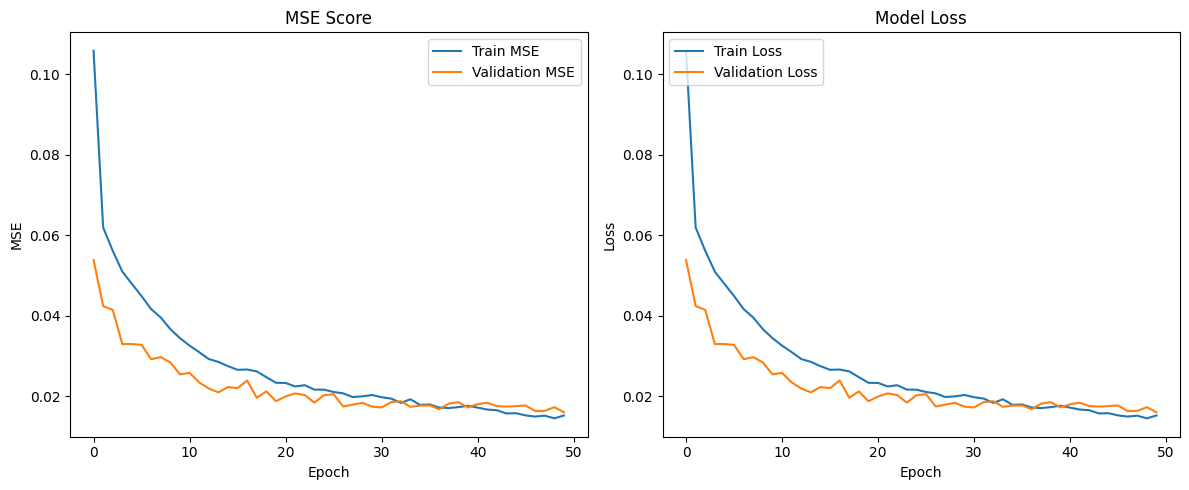

In [ ]:
# Check available keys to avoid KeyErrors
print(history.history.keys())

plt.figure(figsize=(12, 5))

# Plot MSE Scores
plt.subplot(1, 2, 1)
plt.plot(history.history.get('mse', history.history.get('mean_squared_error')), label='Train MSE')
plt.plot(history.history.get('val_mse', history.history.get('val_mean_squared_error')), label='Validation MSE')
plt.title('MSE Score')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('history.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
model.save('model.h5')